In [139]:
print("This paper uses a unique data set of fuel economy by detailed model from 1984-2018, and the results of vehicle testing done at the Environmental Protection Agency's(EPA) National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers with oversight by EPA. Through this paper I will like to explain the following:")

print("1. Change in fuel economy over the period")
print("2. Compare fuel economy before and after the 2009 Recession.")
print("3. Compare the CO2 Emission from tailpipe with cars engine size.")

This paper uses a unique data set of fuel economy by detailed model from 1984-2018, and the results of vehicle testing done at the Environmental Protection Agency's(EPA) National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers with oversight by EPA. Through this paper I will like to explain the following:
1. Change in fuel economy over the period
2. Compare fuel economy before and after the 2009 Recession.
3. Compare the CO2 Emission from tailpipe with cars engine size.


In [103]:
print("I will be importing all the necessary librarys required for the program.")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
gas = pd.read_csv('vehicles1.csv')

I will be importing all the necessary librarys required for the program.


In [104]:
print("Getting the information about the data stored in gas dataset")
gas.info()

Getting the information about the data stored in gas dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37936 entries, 0 to 37935
Data columns (total 49 columns):
year              37936 non-null int64
make              37936 non-null object
model             37936 non-null object
barrels08         37936 non-null float64
city08            37936 non-null int64
comb08            37936 non-null int64
highway08         37936 non-null int64
cylinders         37813 non-null float64
VClass            37936 non-null object
drive             36747 non-null object
displ             37815 non-null float64
co2TailpipeGpm    37936 non-null float64
engId             37936 non-null int64
eng_dscr          22567 non-null object
feScore           37936 non-null int64
fuelCost08        37936 non-null int64
fuelType          37936 non-null object
fuelType1         37936 non-null object
ghgScore          37936 non-null int64
hpv               37936 non-null int64
id                37936 non-null in

In [105]:
print("Here we are cleaning our data. We are putting nan as the replacement for all the non values in our data. ")
print(gas.replace(r'', np.nan, regex=True))

Here we are cleaning our data. We are putting nan as the replacement for all the non values in our data. 
       year         make                model  barrels08  city08  comb08  \
0      1985   Alfa Romeo   Spider Veloce 2000  15.695714      19      21   
1      1985      Ferrari           Testarossa  29.964545       9      11   
2      1985        Dodge              Charger  12.207778      23      27   
3      1985        Dodge  B150/B250 Wagon 2WD  29.964545      10      11   
4      1993       Subaru     Legacy AWD Turbo  17.347895      17      19   
5      1993       Subaru               Loyale  14.982273      21      22   
6      1993       Subaru               Loyale  13.184400      22      25   
7      1993       Toyota              Corolla  13.733750      23      24   
8      1993       Toyota              Corolla  12.677308      23      26   
9      1993       Toyota              Corolla  13.184400      23      25   
10     1993       Toyota              Corolla  12.677308  

In [106]:
print("Our data shows cars which run on gas, electric, hybrid. So, our data has lots of values that are missing. I am repleacing all the missing values with (0) because it will show us the correct stats as some cars have electric engine hence no cylinder, no start/stop.")
gas['cylinders'].fillna(0, inplace=True)
gas['drive'].fillna(0, inplace=True)
gas['displ'].fillna(0, inplace=True)
gas['eng_dscr'].fillna(0, inplace=True)
gas['trany'].fillna(0, inplace=True)
gas['guzzler'].fillna(0, inplace=True)
gas['trans_dscr'].fillna(0, inplace=True)
gas['tCharger'].fillna(0, inplace=True)
gas['sCharger'].fillna(0, inplace=True)
gas['atvType'].fillna(0, inplace=True)
gas['fuelType2'].fillna(0, inplace=True)
gas['rangeA'].fillna(0, inplace=True)
gas['evMotor'].fillna(0, inplace=True)
gas['startStop'].fillna(0, inplace=True)

Our data shows cars which run on gas, electric, hybrid. So, our data has lots of values that are missing. I am repleacing all the missing values with (0) because it will show us the correct stats as some cars have electric engine hence no cylinder, no start/stop.


In [107]:
print("This shows us that all the values are present. This is good as it is hard to use data if there are missing values. ")
print(gas.isnull().sum())

This shows us that all the values are present. This is good as it is hard to use data if there are missing values. 
year              0
make              0
model             0
barrels08         0
city08            0
comb08            0
highway08         0
cylinders         0
VClass            0
drive             0
displ             0
co2TailpipeGpm    0
engId             0
eng_dscr          0
feScore           0
fuelCost08        0
fuelType          0
fuelType1         0
ghgScore          0
hpv               0
id                0
lv2               0
lv4               0
mpgData           0
phevBlended       0
pv2               0
pv4               0
range             0
rangeCity         0
rangeCityA        0
rangeHwy          0
rangeHwyA         0
trany             0
UCity             0
UCityA            0
UHighway          0
UHighwayA         0
youSaveSpend      0
guzzler           0
trans_dscr        0
tCharger          0
sCharger          0
atvType           0
fuelType2         0
rang

In [108]:
print("We are checking how are data looks. We are sorting our data in ascending order with respect to year of make. It shows us that our data start from year 2017 and end in the year 1984.")
gas.sort_values(by='year', ascending=False)

We are checking how are data looks. We are sorting our data in ascending order with respect to year of make. It shows us that our data start from year 2017 and end in the year 1984.


,year,make,model,barrels08,city08,comb08,highway08,cylinders,VClass,drive,...,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,createdOn,modifiedOn,startStop
29872,2017,Kia,Sportage FE AWD,14.982273,21,22,25,4.0,Small Sport Utility Vehicle 4WD,All-Wheel Drive,...,0,0,0,0,0,0,0,Tue Feb 02 00:00:00 EST 2016,Wed May 04 00:00:00 EDT 2016,N
29899,2017,Mitsubishi,Mirage,9.155833,33,36,41,3.0,Compact Cars,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Mar 02 00:00:00 EST 2016,Wed May 04 00:00:00 EDT 2016,N
30323,2017,Land Rover,Range Rover Evoque,13.733750,21,24,29,4.0,Small Sport Utility Vehicle 4WD,4-Wheel Drive,...,0,T,0,0,0,0,0,Thu Jul 07 00:00:00 EDT 2016,Fri Sep 16 00:00:00 EDT 2016,N
29832,2017,Hyundai,Santa Fe Ultimate FWD,16.480500,17,20,23,6.0,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Jan 13 00:00:00 EST 2016,Wed Oct 05 00:00:00 EDT 2016,N
29831,2017,Hyundai,Santa Fe FWD,15.695714,18,21,25,6.0,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Jan 13 00:00:00 EST 2016,Wed Oct 05 00:00:00 EDT 2016,N
29830,2017,Hyundai,Elantra,11.365862,26,29,36,4.0,Midsize Cars,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Jan 13 00:00:00 EST 2016,Wed Oct 05 00:00:00 EDT 2016,N
29829,2017,Hyundai,Elantra,10.300313,28,32,37,4.0,Midsize Cars,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Jan 13 00:00:00 EST 2016,Wed Oct 05 00:00:00 EDT 2016,N
29828,2017,Hyundai,Elantra SE,9.988182,29,33,38,4.0,Midsize Cars,Front-Wheel Drive,...,0,0,0,0,0,0,0,Wed Jan 13 00:00:00 EST 2016,Wed Oct 05 00:00:00 EDT 2016,N
30322,2017,Land Rover,Discovery Sport,14.982273,20,22,25,4.0,Small Sport Utility Vehicle 4WD,4-Wheel Drive,...,0,T,0,0,0,0,0,Thu Jul 07 00:00:00 EDT 2016,Thu Jul 07 00:00:00 EDT 2016,Y
29824,2017,Audi,Q7,15.695714,19,21,25,6.0,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,...,0,0,S,0,0,0,0,Tue Jan 05 00:00:00 EST 2016,Wed May 04 00:00:00 EDT 2016,N


In [109]:
print("In this stat we count the number of cars made by different manufectures over the period. This shows us that the Chevrolet made most number of cars followed by Ford.")
print(gas['make'].value_counts().head())
print("This head shows the number of molels each Manufecture builds.")

In this stat we count the number of cars made by different manufectures over the period. This shows us that the Chevrolet made most number of cars followed by Ford.
Chevrolet    3799
Ford         3128
Dodge        2527
GMC          2390
Toyota       1924
Name: make, dtype: int64
This head shows the number of molels each Manufecture builds.


In [110]:
print(gas['year'].value_counts().tail())
print("We can check the number of cars made per year. It shows us that with time number of cars made per year decrese over time")

1999    852
2000    840
1998    812
1996    773
1997    762
Name: year, dtype: int64
We can check the number of cars made per year. It shows us that with time number of cars made per year decrese over time


The graph shows that the number of cars made per year. It shows how the market changed over time. It also shows us that how well the car manufectures worked to reduce there cost and the manufecturing process. 


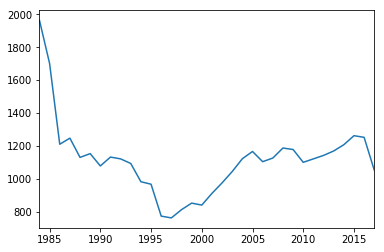

In [55]:
gas['year'].value_counts().sort_index().plot()
print("The graph shows that the number of cars made per year. It shows how the market changed over time. It also shows us that how well the car manufectures worked to reduce there cost and the manufecturing process. ")

In [111]:
print("We describe our data here. It shows us total count, mean, standard deviation, min value and max value. It gives us a overview of our data.")
gas.describe()

We describe our data here. It shows us total count, mean, standard deviation, min value and max value. It gives us a overview of our data.


,year,barrels08,city08,comb08,highway08,cylinders,displ,co2TailpipeGpm,engId,feScore,...,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,youSaveSpend
count,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000,...,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000,37936.000000
mean,2000.116169,17.538963,17.930515,20.165647,24.030261,5.720635,3.309189,473.341854,8839.503453,-0.021404,...,0.394638,0.355286,0.040243,0.344759,0.036606,22.581522,0.665623,33.602838,0.948227,-2757.716944
std,10.425750,4.561923,6.653219,6.591624,6.871149,1.779793,1.373021,121.768864,17812.763376,2.386601,...,8.305500,8.121303,1.276942,8.209074,1.136927,9.364559,5.417399,10.022439,6.165548,2564.898655
min,1984.000000,0.060000,6.000000,7.000000,9.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-22500.000000
25%,1991.000000,14.330870,15.000000,17.000000,20.000000,4.000000,2.200000,390.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,27.100000,0.000000,-4500.000000
50%,2001.000000,17.347895,17.000000,19.000000,24.000000,6.000000,3.000000,467.736842,213.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,33.000000,0.000000,-2500.000000
75%,2009.000000,20.600625,20.000000,23.000000,27.000000,6.000000,4.300000,555.437500,4503.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.137825,0.000000,38.100000,0.000000,-1000.000000
max,2017.000000,47.087143,138.000000,124.000000,111.000000,16.000000,8.400000,1269.571429,69102.000000,10.000000,...,315.000000,305.900000,103.030000,346.900000,90.550000,197.577100,181.560900,159.100000,152.187800,4000.000000


We plotted a graph that shows us the combined fuel economy over the period of time. The regression plot shows us the trend that Fuel economy is improving with time.


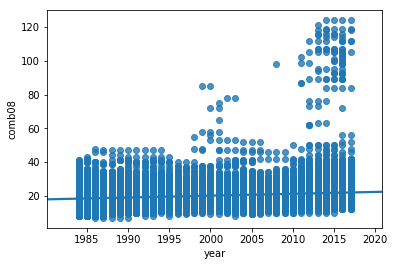

In [112]:
print("We plotted a graph that shows us the combined fuel economy over the period of time. The regression plot shows us the trend that Fuel economy is improving with time.")
sns.regplot(y="comb08", x="year", data=gas, fit_reg = True)

In [116]:
print("Here we are using Ordinary Least Squares method to get some more stats about our data. We get this OLS regression Results by comparing Combined fuel mileage with the years. I shows us R Squared, F statistic results and lot of other results, Which tells us that there is a positive relation between fuel mileage and the years. It also tells us that with time fuel milage is improving. ")
x = ols('comb08 ~ year',gas).fit()
print(x.summary())

Here we are using Ordinary Least Squares method to get some more stats about our data. We get this OLS regression Results by comparing Combined fuel mileage with the years. I shows us R Squared, F statistic results and lot of other results, Which tells us that there is a positive relation between fuel mileage and the years. It also tells us that with time fuel milage is improving. 
                            OLS Regression Results                            
Dep. Variable:                 comb08   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1183.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          2.75e-255
Time:                        14:12:14   Log-Likelihood:            -1.2479e+05
No. Observations:               37936   AIC:                         2.496e+05
Df Residuals:                   37934   BIC:                  

In [115]:
print('Parameters: ', x.params)
print('R2: ', x.rsquared)

Parameters:  Intercept   -199.734478
year           0.109944
dtype: float64
R2:  0.030239200149876577


In [117]:
print("We are calculating the average fuel economy per year by using Groupby method. We are calculating averages for Combined, Highway, City fuel milages.")
grouped = gas.groupby("year")
averaged = grouped['comb08', 'highway08', 'city08'].agg([np.mean])
averaged.columns = ['comb08_mean', 'highway08_mean', 'city08_mean']
print(averaged.head())

We are calculating the average fuel economy per year by using Groupby method. We are calculating averages for Combined, Highway, City fuel milages.
      comb08_mean  highway08_mean  city08_mean
year                                          
1984    19.881874       23.075356    17.982688
1985    19.808348       23.042328    17.878307
1986    19.550413       22.699174    17.665289
1987    19.228549       22.445068    17.310345
1988    19.328319       22.702655    17.333628


This graph shows us the Trend of fuel mileages over the years 1985 to 2008. As we are doing this analysis on US cars. This graph shows us the trend before and after the recession. It also tells us that there was not much change in fuel mileage before 2008.


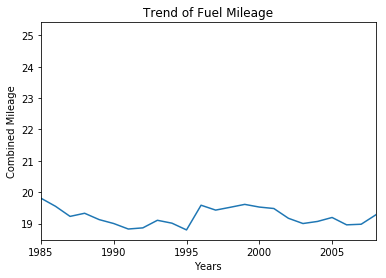

In [119]:
print("This graph shows us the Trend of fuel mileages over the years 1985 to 2008. As we are doing this analysis on US cars. This graph shows us the trend before and after the recession. It also tells us that there was not much change in fuel mileage before 2008.")
fig, ax = plt.subplots()
ax.plot(averaged['comb08_mean'])
plt.xlabel('Years')
plt.ylabel('Combined Mileage')
plt.title('Trend of Fuel Mileage')
plt.xlim([1985, 2008])
plt.show()

This graph shows us gas mileage after the year 2008. As we can clearly see the graph going up. It tells us that sometime around year 2007 the fuel mileage start to rise. more manufectures started making cars with better fuel mileage.


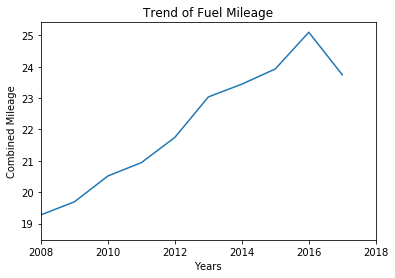

In [120]:
print("This graph shows us gas mileage after the year 2008. As we can clearly see the graph going up. It tells us that sometime around year 2007 the fuel mileage start to rise. more manufectures started making cars with better fuel mileage.")
fig, ax = plt.subplots()
ax.plot(averaged['comb08_mean'])
plt.xlabel('Years')
plt.ylabel('Combined Mileage')
plt.title('Trend of Fuel Mileage')
plt.xlim([2008, 2018])
plt.show()

In [61]:
np.mean(gas['comb08']), np.median(gas['comb08']), np.std(gas['comb08'])

(20.16564740615774, 19.0, 6.591537171743222)

In [62]:
Co2 = gas[['year','displ','cylinders','comb08','co2TailpipeGpm']]
Co2.head()

,year,displ,cylinders,comb08,co2TailpipeGpm
0,1985,2.0,4.0,21,423.190476
1,1985,4.9,12.0,11,807.909091
2,1985,2.2,4.0,27,329.148148
3,1985,5.2,8.0,11,807.909091
4,1993,2.2,4.0,19,467.736842


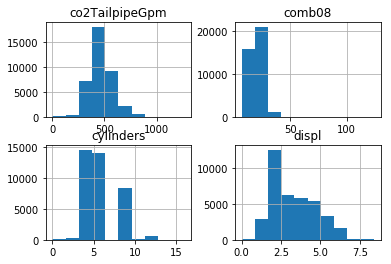

In [63]:
img = Co2[['displ','cylinders','comb08','co2TailpipeGpm']]
img.hist()
plt.show()

In [132]:
print("I would like to tell you about the Tailpipe gases in detail here. Automobiles typically run on gasoline or diesel fuel, both of which are a composite of different chemicals collectively known as hydrocarbons. Mainly carbon and hydrogen, hydrocarbons are volatile Organic Compounds (VOCs), meaning that they readily evaporate at normal temperatures. According to the Environmental Protection Agency, they are a precursor to ground-level ozone and smog. Hydrocarbons result in dangerous emissions because our vehicles do not operate in a vacuum. In a “perfect” combustion engine, all the hydrogen in the fuel would be converted to water by the oxygen in the air. Meanwhile the carbon in the fuel would be converted to carbon dioxide, and the nitrogen already in the air would remain unaltered. However, as is clearly the case, we do not operate in a vacuum, and none of our vehicles are equipped with a perfect engine. Instead, incomplete combustion, combined with high pressure and temperature, results in several toxic exhaust pollutants like Carbon Monoxide, Nitrogen Oxides, Sulfur Oxides, Carbon Dioxide. In addition to exhaust pollutants, petroleum-based fuels also emit dangerous compounds due to evaporation. Typically, these emissions stem from storage tanks and fueling lines. As has been stated, hydrocarbons are VOCs which means that, especially on hot days, they contribute significantly to ground level ozone as they are released from vehicles (both parked and driving), gas stations, and anywhere gas or diesel is stored. A key component of smog, ground-level ozone is formed by reactions involving hydrocarbons and nitrogen oxides in the presence of sunlight. Particulate matter as well, though not a chemical compound, is nevertheless a serious health concern as an auto emission. ")

I would like to tell you about the Tailpipe gases in detail here. Automobiles typically run on gasoline or diesel fuel, both of which are a composite of different chemicals collectively known as hydrocarbons. Mainly carbon and hydrogen, hydrocarbons are volatile Organic Compounds (VOCs), meaning that they readily evaporate at normal temperatures. According to the Environmental Protection Agency, they are a precursor to ground-level ozone and smog. Hydrocarbons result in dangerous emissions because our vehicles do not operate in a vacuum. In a “perfect” combustion engine, all the hydrogen in the fuel would be converted to water by the oxygen in the air. Meanwhile the carbon in the fuel would be converted to carbon dioxide, and the nitrogen already in the air would remain unaltered. However, as is clearly the case, we do not operate in a vacuum, and none of our vehicles are equipped with a perfect engine. Instead, incomplete combustion, combined with high pressure and temperature, result

Now we plot a scatter plot brtween tailpipe Co2 emission and Engine Displacement.


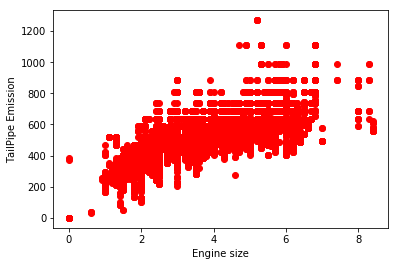

In [129]:
print("Now we plot a scatter plot brtween tailpipe Co2 emission and Engine Displacement.")
plt.scatter(Co2.displ, Co2.co2TailpipeGpm,  color='red')
plt.xlabel("Engine size")
plt.ylabel("TailPipe Emission")
plt.show()

In [122]:
vlu = np.random.rand(len(gas)) < 0.8
train = Co2[vlu]
test = Co2[~vlu]

We are about to use KNN method to calculate Mean Square score, Mean absolute error, Mean square error. We hereby using training data to plot the graph between Tailpipe Co2 emission and engine displacement.


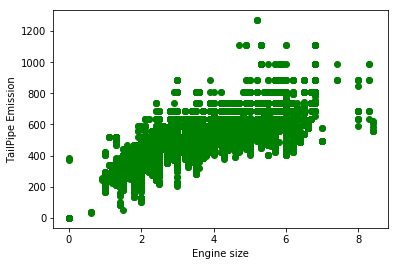

In [130]:
print("We are about to use KNN method to calculate Mean Square score, Mean absolute error, Mean square error. We hereby using training data to plot the graph between Tailpipe Co2 emission and engine displacement.")
plt.scatter(train.displ, train.co2TailpipeGpm,  color='green')
plt.xlabel("Engine size")
plt.ylabel("TailPipe Emission")
plt.show()

In [127]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['displ']])
train_y = np.asanyarray(train[['co2TailpipeGpm']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[71.31250429]]
Intercept:  [237.21783716]


This graph shows a linear regression model between the Tailpipe Co2 emission and Engine displacement. Graph shows us that there is a positive correlation between the two variables. It tells us bigger the engine displacement higher the Tailpipe Co2 Emission. 


Text(0, 0.5, 'TailPipe Co2 Emission')

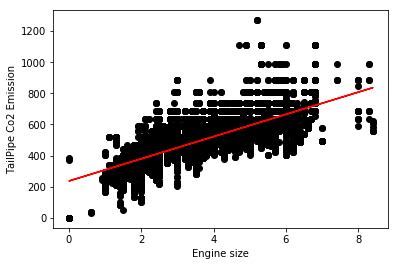

In [128]:
print("This graph shows a linear regression model between the Tailpipe Co2 emission and Engine displacement. Graph shows us that there is a positive correlation between the two variables. It tells us bigger the engine displacement higher the Tailpipe Co2 Emission. ")
plt.scatter(train.displ, train.co2TailpipeGpm,  color='black')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("TailPipe Co2 Emission")

In [131]:
print("Here we test our data. It shows us that their is a relationship between the two variables.  ")
from sklearn.metrics import r2_score

test1 = np.asanyarray(test[['displ']])
test2 = np.asanyarray(test[['co2TailpipeGpm']])
test3 = regr.predict(test1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test3 - test2)))
print("Mean squared error (MSE): %.2f" % np.mean((test3 - test2) ** 2))
print("R2-score: %.2f" % r2_score(test3 , test2) )

Here we test our data. It shows us that their is a relationship between the two variables.  
Mean absolute error: 53.18
Mean squared error (MSE): 5222.44
R2-score: 0.46


We are plotting another graph which shows us correlation between Number of cylenders in a car and the Tailpipe Co2 Emission it produce.


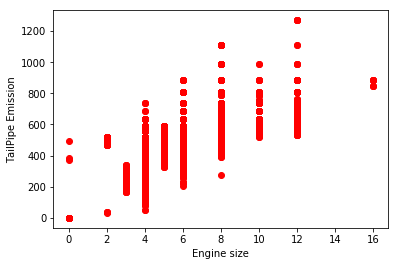

In [133]:
print("We are plotting another graph which shows us correlation between Number of cylenders in a car and the Tailpipe Co2 Emission it produce.")
plt.scatter(Co2.cylinders, Co2.co2TailpipeGpm,  color='red')
plt.xlabel("Engine size")
plt.ylabel("TailPipe Emission")
plt.show()

In [135]:
from sklearn import linear_model
from sklearn.metrics import r2_score
regr = linear_model.LinearRegression()
train_c = np.asanyarray(train[['cylinders']])
train_y = np.asanyarray(train[['co2TailpipeGpm']])
regr.fit (train_c, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[51.8867469]]
Intercept:  [176.23597833]


Text(0, 0.5, 'TailPipe Co2 Emission')

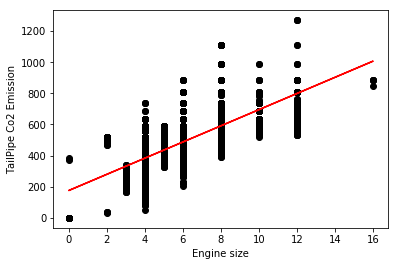

In [136]:
plt.scatter(train.cylinders, train.co2TailpipeGpm,  color='black')
plt.plot(train_c, regr.coef_[0][0]*train_c + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("TailPipe Co2 Emission")

In [137]:
print("We repeated the same process as we did to find the relation between Engine Displacement and Co2 Emission fron Tailpipe. We created a hypothesis that there is no relationship between the two variables. We created a training set and the test set. When we run the test set we get positive result. That cancels our Null Hypothesis. With this test we know that there is a relationship between the Co2 Emission fron tailpipe and the Cars cylinder size.")

testa = np.asanyarray(test[['cylinders']])
testb = np.asanyarray(test[['co2TailpipeGpm']])
testc = regr.predict(testa)

print("Mean absolute error: %.2f" % np.mean(np.absolute(testc - testb)))
print("Mean squared error (MSE): %.2f" % np.mean((testc - testb) ** 2))
print("R2-score: %.2f" % r2_score(testc , testb) )

We repeated the same process as we did to find the relation between Engine Displacement and Co2 Emission fron Tailpipe. We created a hypothesis that there is no relationship between the two variables. We created a training set and the test set. When we run the test set we get positive result. That cancels our Null Hypothesis. With this test we know that there is a relationship between the Co2 Emission fron tailpipe and the Cars cylinder size.
Mean absolute error: 59.58
Mean squared error (MSE): 6248.54
R2-score: 0.27


In [138]:
print("Conclusion: With this paper, I wanted to know that is there any effect of 2009 Recession on vehicles fuel mileages. As we can see from the graph that there is a spike in the fuel mileage during and after 2009. It tells us that more and more Amricans wanted fuel economical cars after the recession. And also from the graphs above we can see that there is a relationsip between the Engine size and the Co2 Emission. It also tells us that the bigger engine sizes are really bad for the environment. To save our environment we should not but cars that are bigger and consume more gas.")

Conclusion: With this paper, I wanted to know that is there any effect of 2009 Recession on vehicles fuel mileages. As we can see from the graph that there is a spike in the fuel mileage during and after 2009. It tells us that more and more Amricans wanted fuel economical cars after the recession. And also from the graphs above we can see that there is a relationsip between the Engine size and the Co2 Emission. It also tells us that the bigger engine sizes are really bad for the environment. To save our environment we should not but cars that are bigger and consume more gas.
